In [1]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path
from tqdm import tqdm

%matplotlib inline

In [2]:
#importing the training options
os.chdir("../")
import config.test_opt as opt

In [3]:
pix2pixhd_dir = Path('./src/pix2pixHD/')

import sys
sys.path.append(str(pix2pixhd_dir))

%load_ext autoreload
%autoreload 2

In [4]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer
from util import html

In [5]:
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [6]:
opt.dataroot

'./dataset_transfer/'

In [7]:
# with open('./config/test_opt.pkl', mode='rb') as f:
#     opt = pickle.load(f)
    
# iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [18]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
visualizer = Visualizer(opt)
# create website
web_dir = os.path.join(opt.results_dir, opt.name, '%s_%s' % (opt.phase, opt.which_epoch))
webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.which_epoch))

CustomDatasetDataLoader
dataset [AlignedDataset] was created


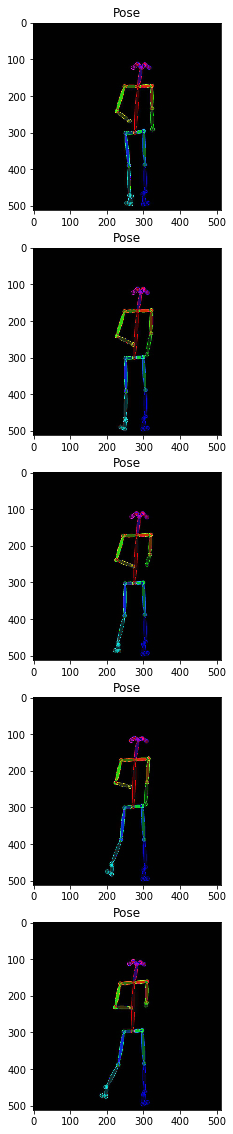

In [19]:
#For Visualization purposes
fig = plt.figure(figsize = [13,20])
for i,temp in enumerate(dataset):
    #Pose
    plt.subplot(5,1,i+1)
    plt.title("Pose")
    plt.imshow(temp['label'][0].permute(1,2,0))

    if i==4:
        break
plt.show()

In [20]:
model = create_model(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affi

In [21]:
for data in tqdm(dataset):
    minibatch = 1 
    generated = model.inference(data['label'], data['inst'])
        
    visuals = OrderedDict([('input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                           ('synthesized_image', util.tensor2im(generated.data[0]))])
    img_path = data['path']
    visualizer.save_images(webpage, visuals, img_path)
webpage.save()
torch.cuda.empty_cache()

  0%|          | 0/119 [00:00<?, ?it/s]src/pix2pixHD/models/pix2pixHD_model.py:128: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_label = Variable(input_label, volatile=infer)
100%|██████████| 119/119 [00:41<00:00,  2.90it/s]
